# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [8]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
import math
df = pd.read_csv('data/human_body_temperature.csv')

# Is the distribution of Body temperature normal?

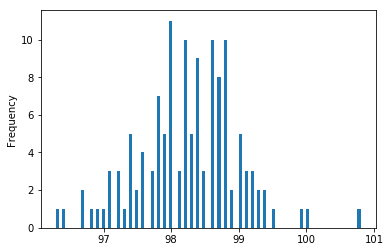

In [3]:
# Your work here.
df['temperature'].plot(kind='hist', bins = 100)
plt.show()
plt.xlabel('Degrees')
plt.title('Human Temperature Distribution')

The above bar plot shows that the distribution of temperature is somewhat normal. but it does not clearly shows that the data
is normal. We will run a normality test to get the final answer

In [4]:

scipy.stats.normaltest(df['temperature'])

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

The pvalue is 0.25, hence we can assume that the distribution is normal in nature.

# Is the sample size large?

In [5]:
print('The sample size is ', len(df))

The sample size is  130


The sample size is greater than 30, so we can say that the sample size is big

# Is true population mean 98.6 ?

The sample size is large, hence conducting a Z -test
The hypothesis is-
H0 - The population mean is equal to the population mean
H1 - The population mean is NOT equal to the population mean (Alternative hypothesis)

Conducting a one tail t-test

In [11]:
scipy.stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [13]:
print(df['temperature'].mean())
print(df['temperature'].std())

98.2492307692
0.733183158039


Looking on the p value , we can say that the average body temperature is incorrect.

Conducting a z-test to compare

In [14]:
# z-test
z_stat = (df['temperature'].mean() - 98.6)/(df['temperature'].std()/(math.sqrt(len(df['temperature']))))

print(scipy.stats.norm.cdf(z_stat) * 2)

4.9021570141e-08


The p value ofr the z-test is much smaller than the t-test, hence uour conclusion remain the same, we can say the average human
body temperature is not 98.6 degree F

# At what temperature should we consider someone's temperature to be "abnormal"? 


In [26]:
# calculating the intervals
critical_t = scipy.stats.t.ppf(0.975, len(df['temperature']) - 1)
multiplier = critical_t * df['temperature'].std() * math.sqrt((1 + 1/(len(df['temperature']))))


print('The interval is ', [(df['temperature'].mean() - multiplier),(df['temperature'].mean() + multiplier) ])

The interval is  [96.793041311796543, 99.705420226664955]


Anything beyond this interval can be considered as the abnormal temperature